In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics


In [37]:
#消除success的背景區域圖
csv_data = pd.read_csv('database2.csv')

In [38]:
csv_data = csv_data.drop('Unnamed: 0',axis = 1)   #消除第0行

In [39]:
'''
label_name = {
    0:'success',
    1:'fail',
    2:'noExtusion'
}

csv_data['label'] = csv_data['label'].map(label_name)   #將label的0 1 2置換成列印狀態
'''
csv_data


,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.444063,0.036914,0.054677,0.023335,0.070880,0.085737,0.014119,0.006116,0.444063,0.444063,...,0.079485,0.090765,0.114299,0.018888,0.040074,0.069765,0.178182,0.245363,0.119248,0
1,0.454810,0.007934,0.013114,0.035291,0.092743,0.048458,0.014482,0.006121,0.454810,0.454810,...,0.087816,0.164690,0.148902,0.065512,0.036474,0.116183,0.231543,0.153230,0.118731,0
2,0.449740,0.016068,0.031380,0.049523,0.050638,0.056034,0.039589,0.017392,0.449740,0.449740,...,0.142515,0.085284,0.094300,0.049038,0.096485,0.096112,0.189380,0.199613,0.116932,0
3,0.452308,0.003589,0.007422,0.049267,0.107743,0.042343,0.007986,0.002101,0.452308,0.452308,...,0.124520,0.160884,0.120655,0.114212,0.060669,0.128330,0.139216,0.168510,0.132645,0
4,0.402234,0.093548,0.235625,0.039485,0.036178,0.031803,0.040292,0.028391,0.402234,0.402234,...,0.250909,0.158331,0.065201,0.053144,0.116564,0.197724,0.093178,0.106081,0.283997,0
5,0.445816,0.016792,0.019524,0.049100,0.120731,0.042616,0.004973,0.008101,0.445816,0.445816,...,0.148019,0.087069,0.090303,0.085717,0.085609,0.140627,0.181312,0.148626,0.120781,0
6,0.432625,0.076960,0.087284,0.023937,0.055522,0.076192,0.020203,0.014194,0.432625,0.432625,...,0.109630,0.139604,0.083238,0.013313,0.041299,0.102469,0.280667,0.134302,0.128339,0
7,0.412829,0.047402,0.097123,0.049815,0.070938,0.066587,0.032602,0.028781,0.412829,0.412829,...,0.067186,0.135504,0.114309,0.101579,0.137030,0.153855,0.140311,0.278920,0.258237,0
8,0.043024,0.046891,0.195151,0.133714,0.119128,0.140559,0.174758,0.177190,0.110818,0.104138,...,0.257945,0.211101,0.202614,0.188733,0.209298,0.137798,0.101096,0.128527,0.205613,0
9,0.056326,0.105865,0.142223,0.140999,0.141001,0.146119,0.229365,0.175563,0.089769,0.049281,...,0.191443,0.226494,0.317821,0.225870,0.111751,0.115174,0.191585,0.205092,0.204157,0


In [40]:
# 判斷是否重複
csv_data.duplicated()
#移除重複數據
csv_data = csv_data.drop_duplicates()
csv_data

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
0,0.444063,0.036914,0.054677,0.023335,0.070880,0.085737,0.014119,0.006116,0.444063,0.444063,...,0.079485,0.090765,0.114299,0.018888,0.040074,0.069765,0.178182,0.245363,0.119248,0
1,0.454810,0.007934,0.013114,0.035291,0.092743,0.048458,0.014482,0.006121,0.454810,0.454810,...,0.087816,0.164690,0.148902,0.065512,0.036474,0.116183,0.231543,0.153230,0.118731,0
2,0.449740,0.016068,0.031380,0.049523,0.050638,0.056034,0.039589,0.017392,0.449740,0.449740,...,0.142515,0.085284,0.094300,0.049038,0.096485,0.096112,0.189380,0.199613,0.116932,0
3,0.452308,0.003589,0.007422,0.049267,0.107743,0.042343,0.007986,0.002101,0.452308,0.452308,...,0.124520,0.160884,0.120655,0.114212,0.060669,0.128330,0.139216,0.168510,0.132645,0
4,0.402234,0.093548,0.235625,0.039485,0.036178,0.031803,0.040292,0.028391,0.402234,0.402234,...,0.250909,0.158331,0.065201,0.053144,0.116564,0.197724,0.093178,0.106081,0.283997,0
5,0.445816,0.016792,0.019524,0.049100,0.120731,0.042616,0.004973,0.008101,0.445816,0.445816,...,0.148019,0.087069,0.090303,0.085717,0.085609,0.140627,0.181312,0.148626,0.120781,0
6,0.432625,0.076960,0.087284,0.023937,0.055522,0.076192,0.020203,0.014194,0.432625,0.432625,...,0.109630,0.139604,0.083238,0.013313,0.041299,0.102469,0.280667,0.134302,0.128339,0
7,0.412829,0.047402,0.097123,0.049815,0.070938,0.066587,0.032602,0.028781,0.412829,0.412829,...,0.067186,0.135504,0.114309,0.101579,0.137030,0.153855,0.140311,0.278920,0.258237,0
8,0.043024,0.046891,0.195151,0.133714,0.119128,0.140559,0.174758,0.177190,0.110818,0.104138,...,0.257945,0.211101,0.202614,0.188733,0.209298,0.137798,0.101096,0.128527,0.205613,0
9,0.056326,0.105865,0.142223,0.140999,0.141001,0.146119,0.229365,0.175563,0.089769,0.049281,...,0.191443,0.226494,0.317821,0.225870,0.111751,0.115174,0.191585,0.205092,0.204157,0


In [41]:
display(csv_data.describe())      #使用describe()函數查看每一列的描述性統計量

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,label
count,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,...,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000,4670.000000
mean,0.148160,0.127868,0.144506,0.118093,0.147087,0.110974,0.123504,0.111951,0.146424,0.152006,...,0.154837,0.133369,0.150646,0.136522,0.168071,0.140688,0.163686,0.153521,0.166074,0.495289
std,0.114284,0.098825,0.109261,0.079850,0.105694,0.079067,0.095039,0.080279,0.113174,0.112746,...,0.092114,0.084385,0.091938,0.080225,0.092450,0.086305,0.100278,0.090062,0.093515,0.559847
min,0.000838,0.000382,0.000201,0.001000,0.001107,0.000766,0.000112,0.000131,0.000370,0.000328,...,0.001232,0.000180,0.000565,0.000362,0.001038,0.000700,0.000280,0.000218,0.001288,0.000000
25%,0.063669,0.043823,0.046919,0.055302,0.076801,0.050360,0.043402,0.047643,0.064182,0.064715,...,0.085386,0.069096,0.078454,0.073484,0.099144,0.074573,0.085684,0.086699,0.096913,0.000000
50%,0.109656,0.109312,0.123932,0.103602,0.122418,0.094923,0.107209,0.100178,0.107961,0.115842,...,0.138591,0.124381,0.143101,0.125961,0.151879,0.129459,0.157893,0.146239,0.149398,0.000000
75%,0.209318,0.193335,0.230112,0.163940,0.183414,0.150868,0.185109,0.160128,0.199974,0.219521,...,0.209967,0.189488,0.216449,0.187931,0.228162,0.193152,0.237989,0.214466,0.223052,1.000000
max,0.476077,0.434544,0.494921,0.405661,0.609237,0.440839,0.412547,0.406091,0.490887,0.476077,...,0.467994,0.414821,0.457890,0.457181,0.515589,0.515589,0.566239,0.475100,0.506419,2.000000


In [42]:
csv_data.std()  #使用std()函數可以求得DataFrame對象每一列的標準差

0        0.114284
1        0.098825
2        0.109261
3        0.079850
4        0.105694
5        0.079067
6        0.095039
7        0.080279
8        0.113174
9        0.112746
10       0.089807
11       0.099163
12       0.081202
13       0.110263
14       0.077514
15       0.098431
16       0.087168
17       0.114817
18       0.091596
19       0.094964
20       0.119504
21       0.088944
22       0.094596
23       0.075920
24       0.101575
25       0.094083
26       0.095754
27       0.093487
28       0.094989
29       0.105793
           ...   
115      0.081793
116      0.102791
117      0.096568
118      0.079573
119      0.084729
120      0.076510
121      0.091699
122      0.076340
123      0.091575
124      0.088279
125      0.104247
126      0.091434
127      0.083819
128      0.097414
129      0.081115
130      0.088738
131      0.075744
132      0.095535
133      0.087208
134      0.090266
135      0.092114
136      0.084385
137      0.091938
138      0.080225
139      0

###  進行validation 將資料分為五等分    其中四等拿來train 一等拿來test  ,故可訓練出五種分類器

In [43]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = SVC(C = 1.0 ,kernel = 'rbf' ,random_state=0)
Features = csv_data.drop('label',axis=1)
Label = csv_data['label']

In [44]:
accuracies = []
confmats = []
for train_index, test_index in k_fold.split(Label):
    #print(np.shape(test_index))
    #print(np.shape(train_index))
    trained = model.fit(Features.loc[train_index].values, Label.loc[train_index].values)
    X_test = Features.loc[test_index].values
    y_test = Label.loc[test_index].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))
    

In [45]:
accuracies  #五個模型的準確度

[0.8008565310492506,
 0.8211991434689507,
 0.7955032119914347,
 0.8233404710920771,
 0.8233404710920771]

In [46]:
acc = np.array(accuracies)
print("平均值 = {:f}".format(np.average(acc)))
print("標準差 = {:f}".format(np.std(acc)))

平均值 = 0.812848
標準差 = 0.012121


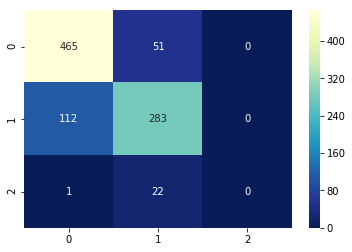

In [47]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")

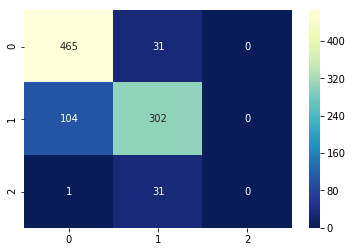

In [48]:
sns.heatmap(confmats[1], cmap="YlGnBu_r", annot=True, fmt="d")

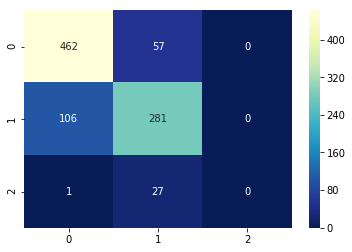

In [49]:
sns.heatmap(confmats[2], cmap="YlGnBu_r", annot=True, fmt="d")

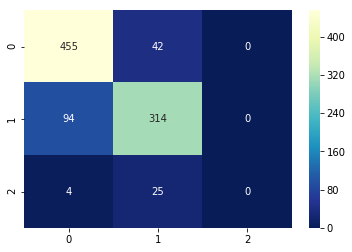

In [50]:
sns.heatmap(confmats[3], cmap="YlGnBu_r", annot=True, fmt="d")

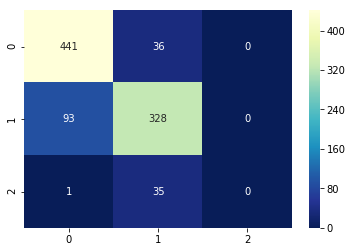

In [51]:
sns.heatmap(confmats[4], cmap="YlGnBu_r", annot=True, fmt="d")